In [2]:
results_path

PosixPath('/home/df630/conditional_rate_matching/results')

100it [00:07, 13.82it/s]


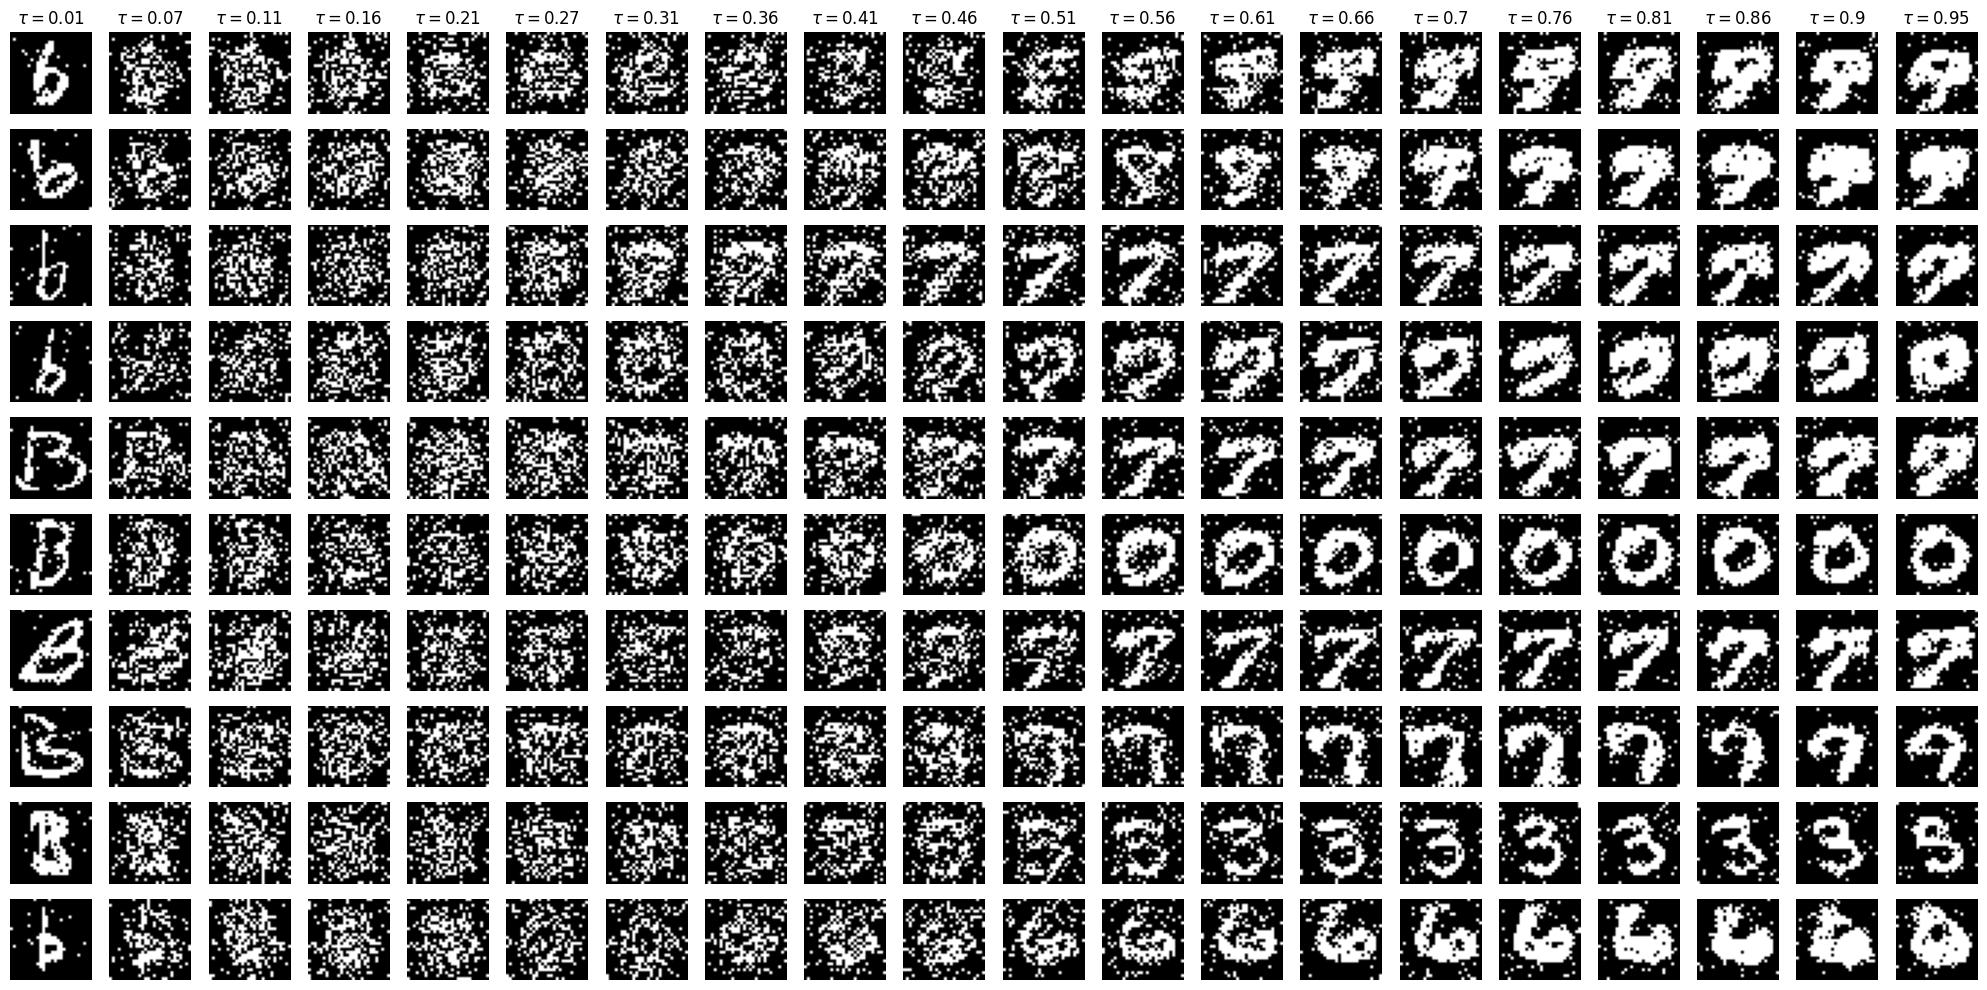

tensor([7, 2, 3, 3, 0, 3, 3, 7, 8, 3])


(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [25]:
import os
import torch
import numpy as np


from conditional_rate_matching.models.generative_models.crm import CRM
from conditional_rate_matching.utils.plots.images_plots import mnist_noise_bridge
from conditional_rate_matching import results_path
from conditional_rate_matching import plots_path
from conditional_rate_matching.models.metrics.fid_metrics import load_classifier

def test_mnist_maps_batch_example(trained_model, label_to_see, number_of_images_to_see=5, steps_of_noise_to_see = 20, device="cpu"):
    """
    just one sample from source and classification
    """
    from conditional_rate_matching.utils.data.samples import select_label
    experiment_dir = os.path.join(results_path,"crm", trained_model ,"run")
    device = torch.device(device)
    crm = CRM(experiment_dir=experiment_dir, device=device)
    classifier = load_classifier(crm.config.data1.dataset_name, device)
    selected_images = select_label(crm.dataloader_0, label_to_see=label_to_see, sample_size=number_of_images_to_see,train=True)

    num_images_encountered = selected_images.size(0)
    crm.config.pipeline.number_of_steps = 100
    crm.config.pipeline.num_intermediates = steps_of_noise_to_see
    x_f, x_hist, ts = crm.pipeline(100, return_intermediaries=True, train=False, x_0=selected_images)
    mnist_noise_bridge(x_hist, ts, steps_of_noise_to_see, min(num_images_encountered,number_of_images_to_see), save_path=None)
    y = classifier(x_f.view(-1, 1, 28, 28))
    y = torch.argmax(y, dim=1)
    print(y)
    return selected_images, x_f, x_hist, ts

test_mnist_maps_batch_example(trained_model="emnist_to_mnist_unet_cfm_0.1",
                               label_to_see=2,
                               number_of_images_to_see=10,
                               steps_of_noise_to_see=20,
                               device="cpu")

100it [00:07, 14.17it/s]


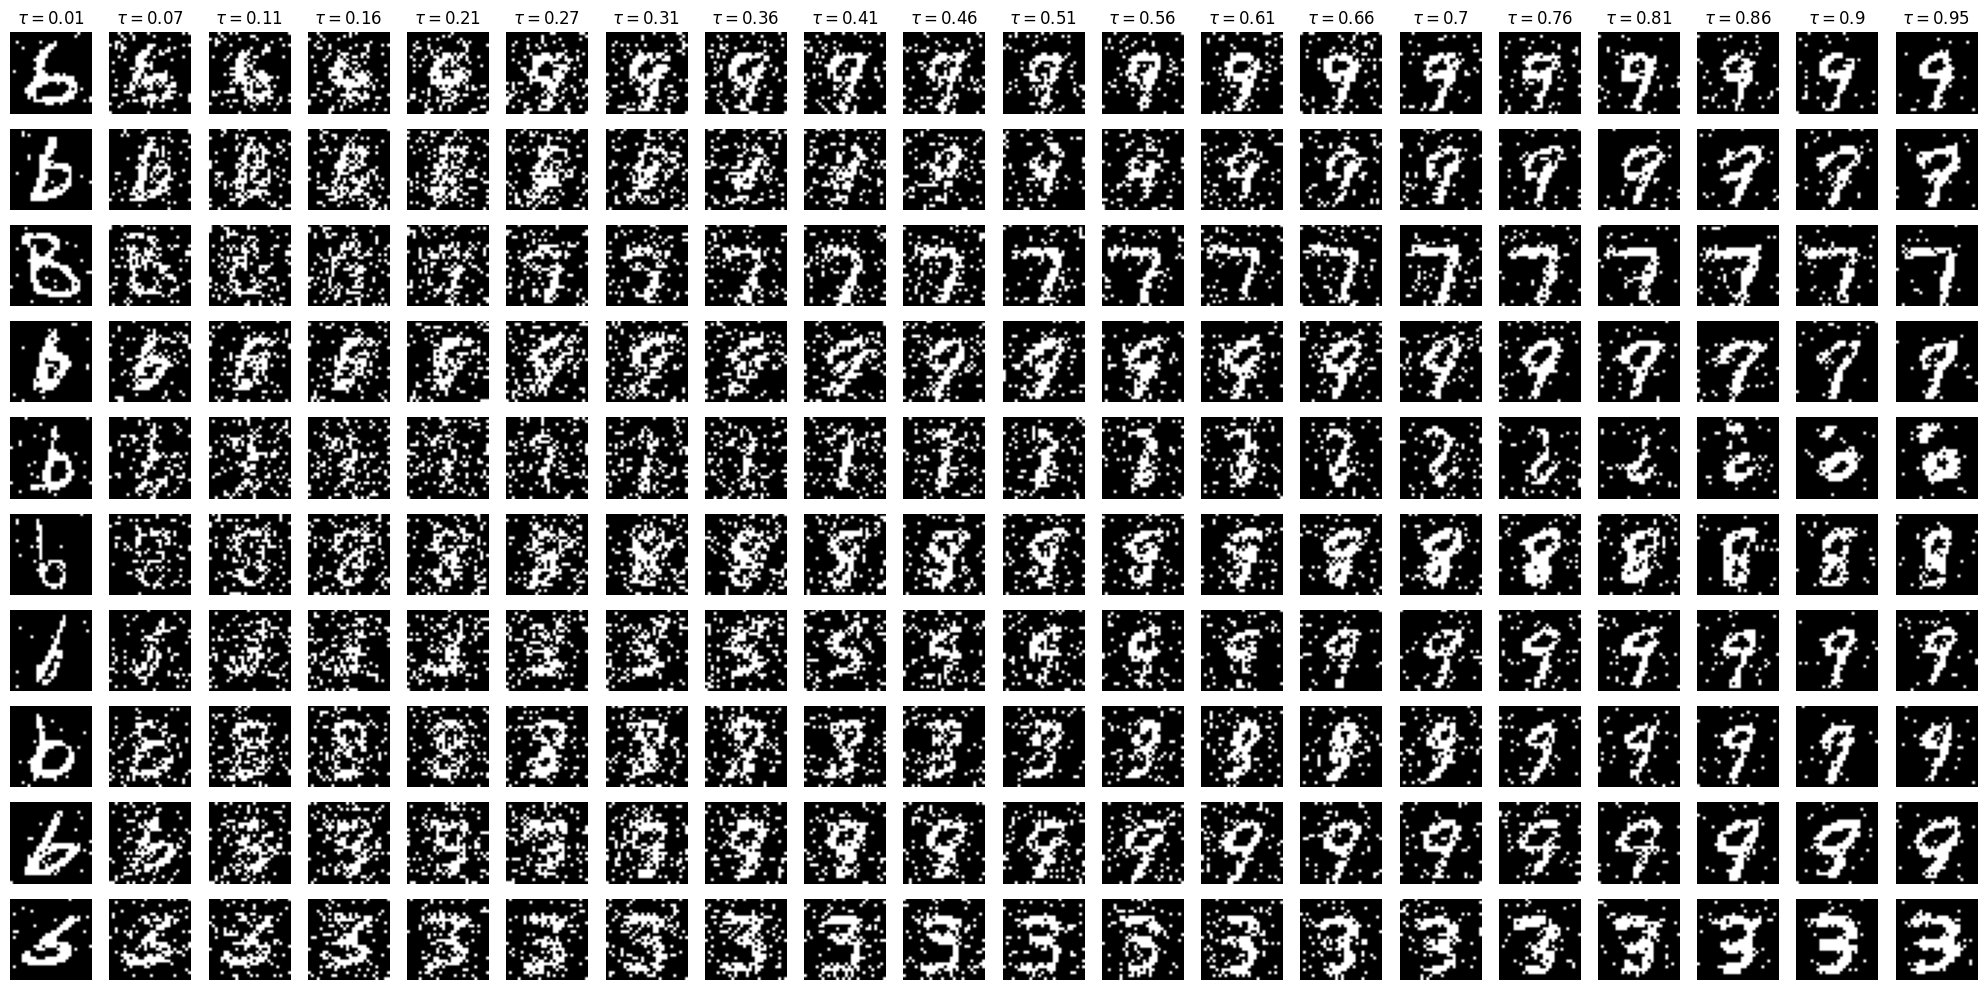

tensor([9, 9, 7, 9, 6, 9, 9, 9, 9, 3])


(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [29]:
test_mnist_maps_batch_example(trained_model="emnist_to_mnist_unet_cfm_OT_0.1",
                               label_to_see=2,
                               number_of_images_to_see=10,
                               steps_of_noise_to_see=20,
                               device="cpu")

100it [00:04, 20.03it/s]


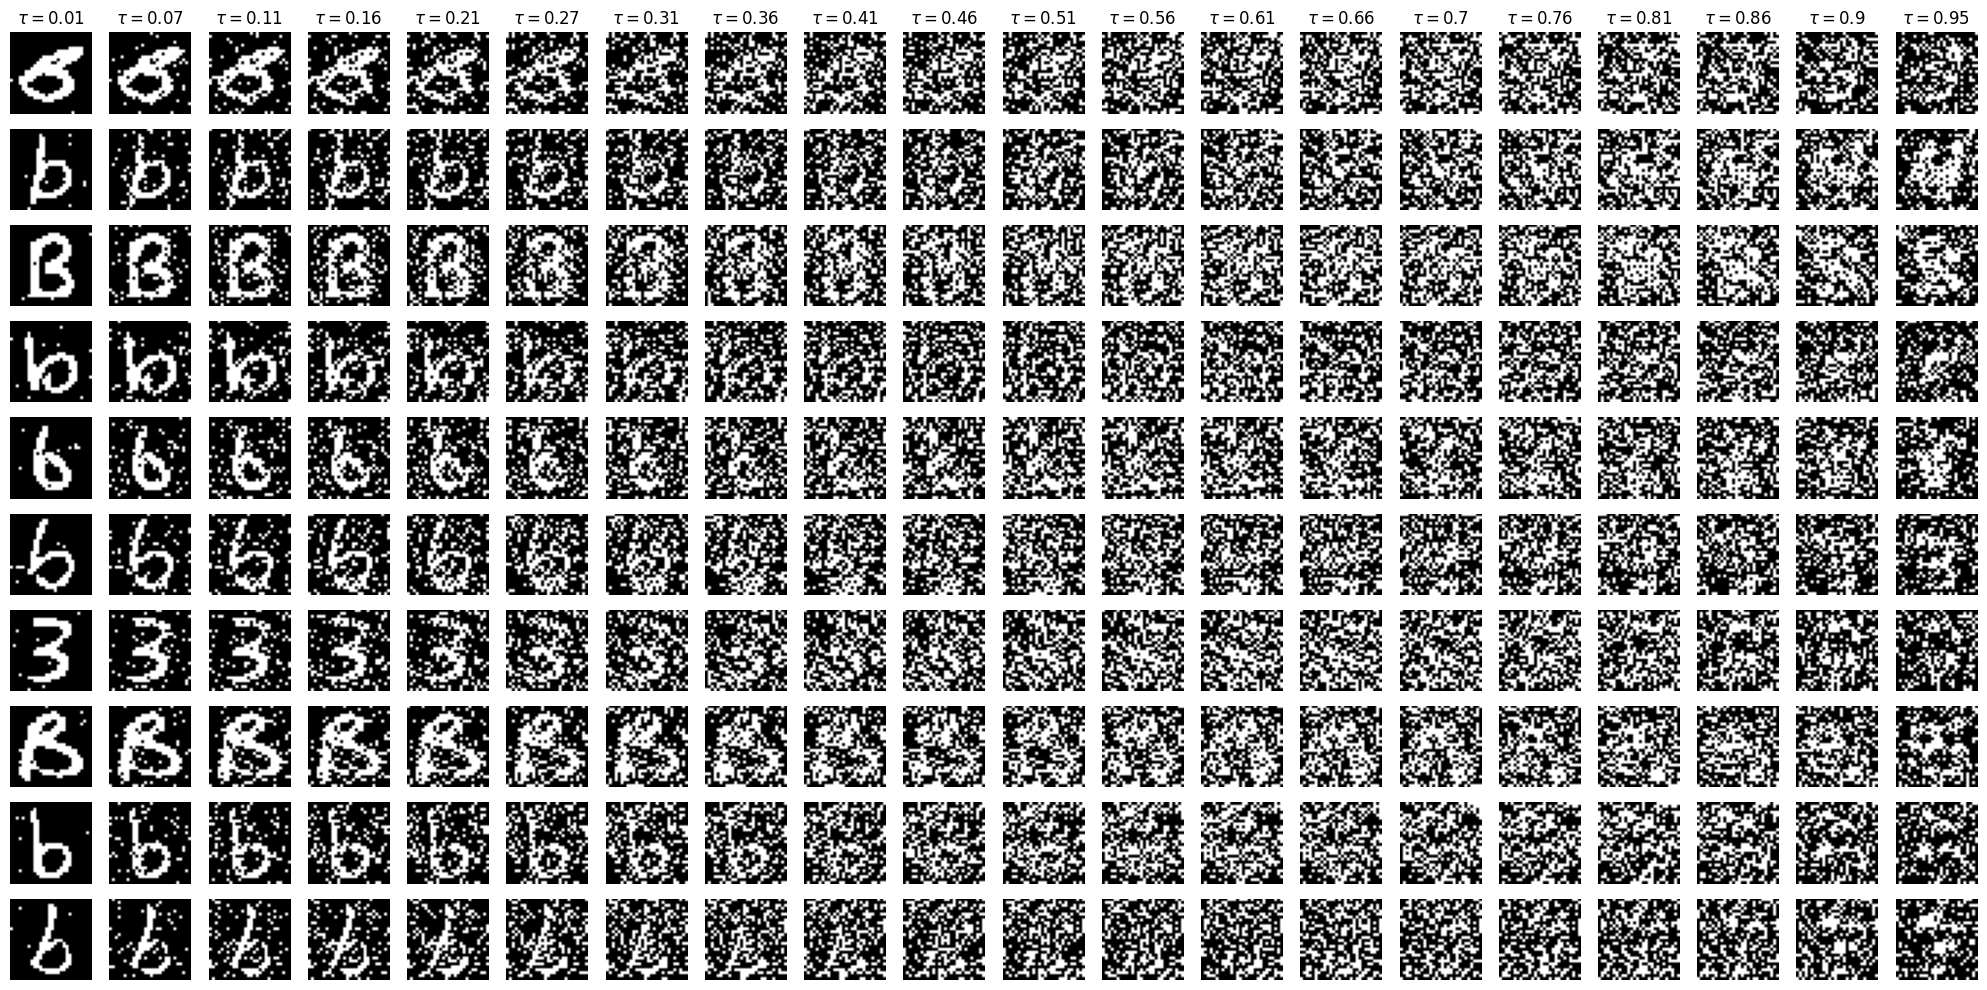

tensor([5, 6, 8, 1, 8, 7, 5, 3, 9, 7])


(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [31]:
test_mnist_maps_batch_example(trained_model="emnist_to_mnist_unet_cfm_OT_1.5",
                              label_to_see=2,
                              number_of_images_to_see=10,
                              steps_of_noise_to_see=20,
                              device="cpu")

###  Conditional Rate-Matching: EMNIST $\to$ Digits-MNIST

In [1]:
from DynGenModels.configs.registered_experiments import Config_MNIST_UNet_CondFlowMatch 
from DynGenModels.models.experiment import Experiment

path = '../../results/emnist_to_mnist.ConditionalFlowMatching.Unet.2024.02.13_21h03'
cfm = Experiment(Config_MNIST_UNet_CondFlowMatch, path=path, DEVICE='cuda:1')
cfm.load()

path = '../../results/emnist_to_mnist.OptimalTransportFlowMatching.Unet.2024.02.14_16h48'
cfm_OT = Experiment(Config_MNIST_UNet_CondFlowMatch, path=path, DEVICE='cuda:1')
cfm_OT.load()

+---------------------+-------------------------+
| Parameters          | Values                  |
+---------------------+-------------------------+
| NAME                | emnist_to_mnist         |
| DATA_SOURCE         | emnist                  |
| DATA_TARGET         | mnist                   |
| DIM_INPUT           | 784                     |
| INPUT_SHAPE         | [1, 28, 28]             |
| DEVICE              | cuda:3                  |
| OPTIMIZER           | Adam                    |
| LR                  | 0.0001                  |
| WEIGHT_DECAY        | 0.0                     |
| OPTIMIZER_BETAS     | [0.9, 0.999]            |
| OPTIMIZER_EPS       | 1e-08                   |
| OPTIMIZER_AMSGRAD   | False                   |
| GRADIENT_CLIP       |                         |
| SCHEDULER           |                         |
| SCHEDULER_T_MAX     |                         |
| SCHEDULER_ETA_MIN   |                         |
| SCHEDULER_GAMMA     |                         |


2024-02-14 19:27:35.375824: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-14 19:27:35.420481: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-14 19:27:35.421218: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-14 19:27:36.165831: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO: building dataloaders...
INFO: train/val/test split ratios: 1.0/0.0/0.0
INFO: train size: 60000, validation size: 0, testing sizes: 0
+---------------------+------------------------------+
| Parameters          | Values                       |
+---------------------+------------------------------+
| NAME                | emnist_to_mnist              |
| DATA_SOURCE         | emnist                       |
| DATA_TARGET         | mnist                        |
| DIM_INPUT           | 784                          |
| INPUT_SHAPE         | [1, 28, 28]                  |
| DEVICE              | cuda:3                       |
| OPTIMIZER           | Adam                         |
| LR                  | 0.0001                       |
| WEIGHT_DECAY        | 0.0                          |
| OPTIMIZER_BETAS     | [0.9, 0.999]                 |
| OPTIMIZER_EPS       | 1e-08                        |
| OPTIMIZER_AMSGRAD   | False                        |
| GRADIENT_CLIP       |             

In [ ]:
cfm.generate_samples(input_source=cfm.dataset.source_test[:100])
cfm_OT.generate_samples(input_source=cfm_OT.dataset.source_test[:100])

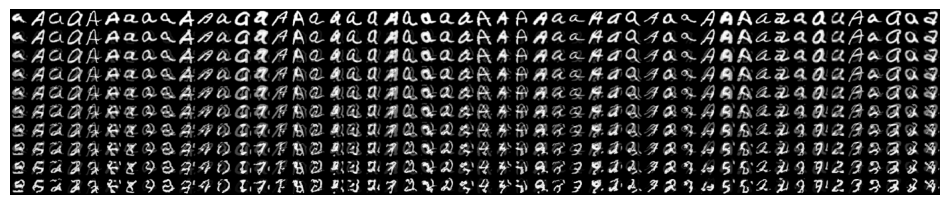

In [3]:
from utils import plot_image_evolution
plot_image_evolution(cfm.pipeline, nrow=50, figsize=(12,12))

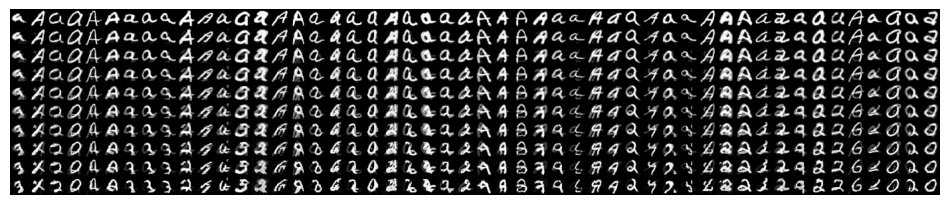

In [4]:
from utils import plot_image_evolution
plot_image_evolution(cfm_OT.pipeline, nrow=50, figsize=(12,12))

### Experiment with classes

In [5]:
path = '../../results/emnist_to_mnist.ConditionalFlowMatching.Unet.2024.02.13_21h03'
cfm_a = Experiment(Config_MNIST_UNet_CondFlowMatch, path=path, DEVICE='cuda:1')
cfm_a.load()

path = '../../results/emnist_to_mnist.OptimalTransportFlowMatching.Unet.2024.02.14_16h48'
cfm_OT_a = Experiment(Config_MNIST_UNet_CondFlowMatch, path=path, DEVICE='cuda:1')
cfm_OT_a.load()

+---------------------+-------------------------+
| Parameters          | Values                  |
+---------------------+-------------------------+
| NAME                | emnist_to_mnist         |
| DATA_SOURCE         | emnist                  |
| DATA_TARGET         | mnist                   |
| DIM_INPUT           | 784                     |
| INPUT_SHAPE         | [1, 28, 28]             |
| DEVICE              | cuda:3                  |
| OPTIMIZER           | Adam                    |
| LR                  | 0.0001                  |
| WEIGHT_DECAY        | 0.0                     |
| OPTIMIZER_BETAS     | [0.9, 0.999]            |
| OPTIMIZER_EPS       | 1e-08                   |
| OPTIMIZER_AMSGRAD   | False                   |
| GRADIENT_CLIP       |                         |
| SCHEDULER           |                         |
| SCHEDULER_T_MAX     |                         |
| SCHEDULER_ETA_MIN   |                         |
| SCHEDULER_GAMMA     |                         |


In [31]:
from utils import plot_image_evolution, mnist_classifier

### a,A $\to$ numbers: 

In [ ]:
import torch
c = 1
test = cfm.dataset.source_test[torch.tensor(cfm.dataset.source_test_label) == c]
cfm.generate_samples(input_source=test)
cfm_OT.generate_samples(input_source=test)

conditional OT:

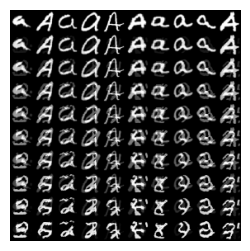

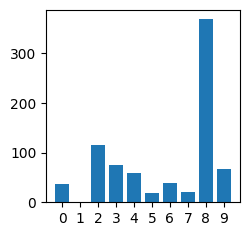

In [33]:
plot_image_evolution(cfm.pipeline)
mnist_classifier(cfm.pipeline, plot_histogram=True)

OT:

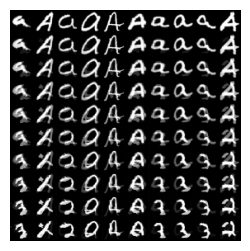

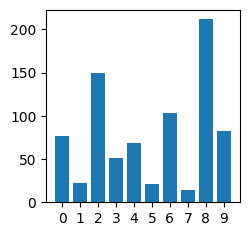

In [34]:
plot_image_evolution(cfm_OT.pipeline)
mnist_classifier(cfm_OT.pipeline, plot_histogram=True)

### b,B $\to$ numbers: 

In [ ]:
import torch
c = 2
test = cfm.dataset.source_test[torch.tensor(cfm.dataset.source_test_label) == c]
cfm.generate_samples(input_source=test)
cfm_OT.generate_samples(input_source=test)

Conditional OT:

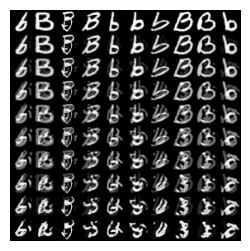

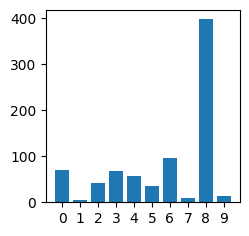

In [36]:
plot_image_evolution(cfm.pipeline)
mnist_classifier(cfm.pipeline, plot_histogram=True)

OT:

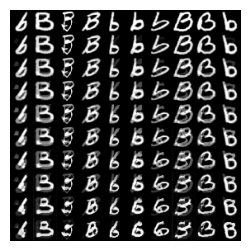

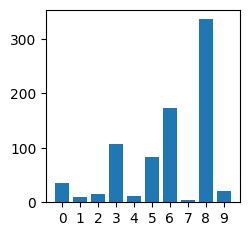

In [37]:
plot_image_evolution(cfm_OT.pipeline)
mnist_classifier(cfm_OT.pipeline, plot_histogram=True)

### o,O $\to$ numbers: 

In [ ]:
import torch
c = 15
test = cfm.dataset.source_test[torch.tensor(cfm.dataset.source_test_label) == c]
cfm.generate_samples(input_source=test)
cfm_OT.generate_samples(input_source=test)

conditional OT:

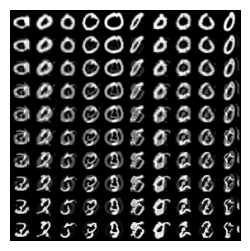

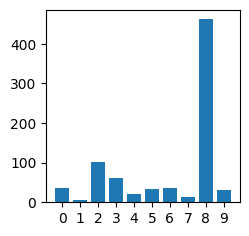

In [39]:
plot_image_evolution(cfm.pipeline)
mnist_classifier(cfm.pipeline, plot_histogram=True)

OT:

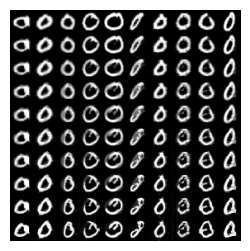

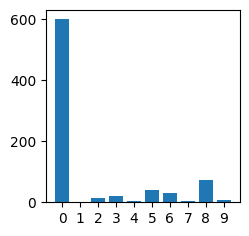

In [40]:
plot_image_evolution(cfm_OT.pipeline)
mnist_classifier(cfm_OT.pipeline, plot_histogram=True)